In [2]:
import pandas as pd
import numpy as np
from datetime import datetime


#### Experimenting graph plotting with COVID-19 data from John Hopkins University.

In [3]:
# Get data from repo, squash table into country-only data. The raw table 
# offers subdivisions (province, state, county level data) for some countries.

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df = df.drop(columns=["Province/State", "Lat", "Long"])
df = df.groupby("Country/Region").sum()
df = df.rename(columns=lambda x: datetime.strptime(x, "%m/%d/%y").strftime("%d/%b/%Y"))
# df.head()
df
# df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum().sort_values(by=df.columns[-1], ascending=False)

,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,28/Jan/2020,29/Jan/2020,30/Jan/2020,31/Jan/2020,...,26/Mar/2020,27/Mar/2020,28/Mar/2020,29/Mar/2020,30/Mar/2020,31/Mar/2020,01/Apr/2020,02/Apr/2020,03/Apr/2020,04/Apr/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
Albania,0,0,0,0,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
Algeria,0,0,0,0,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
Andorra,0,0,0,0,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,107,107,119,119,135,135,143,146,153,155
Vietnam,0,2,2,2,2,2,2,2,2,2,...,153,163,174,188,203,212,218,233,237,240
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,84,91,98,109,116,119,134,161,194,217


##### Create plot for a given country. 

In [7]:
def random_country():
    """
    Gets a country at random. Weights more highly for countries
    with more cases, using a Pareto distribution.
    """
    df = (  # Get the data in a format we want to work with
        pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
        .drop(columns=["Province/State", "Lat", "Long"])
        .groupby("Country/Region")
        .sum()
        .rename(
            columns=lambda x: datetime.strptime(x, "%m/%d/%y").strftime("%d%b%Y")
        )
    )

    df = df.sort_values(by=df.columns[-1], ascending=False)

    indexes = df.index
    dist = distribution(len(indexes))

    chosen = np.random.choice(indexes, 1, p=dist)[0]
    return chosen

In [8]:
def distribution(n):
    """
    Returns a Pareto distribution of n length
    """
    d = np.random.pareto(1, n)
    distribution = list(d / d.sum(axis=0, keepdims=1)).sort(reverse=True)
    return distribution

21/Feb/2020        20.0
22/Feb/2020        62.0
23/Feb/2020       155.0
24/Feb/2020       229.0
25/Feb/2020       322.0
26/Feb/2020       453.0
27/Feb/2020       655.0
28/Feb/2020       888.0
29/Feb/2020      1128.0
01/Mar/2020      1694.0
02/Mar/2020      2036.0
03/Mar/2020      2502.0
04/Mar/2020      3089.0
05/Mar/2020      3858.0
06/Mar/2020      4636.0
07/Mar/2020      5883.0
08/Mar/2020      7375.0
09/Mar/2020      9172.0
10/Mar/2020     10149.0
11/Mar/2020     12462.0
12/Mar/2020     12462.0
13/Mar/2020     17660.0
14/Mar/2020     21157.0
15/Mar/2020     24747.0
16/Mar/2020     27980.0
17/Mar/2020     31506.0
18/Mar/2020     35713.0
19/Mar/2020     41035.0
20/Mar/2020     47021.0
21/Mar/2020     53578.0
22/Mar/2020     59138.0
23/Mar/2020     63927.0
24/Mar/2020     69176.0
25/Mar/2020     74386.0
26/Mar/2020     80589.0
27/Mar/2020     86498.0
28/Mar/2020     92472.0
29/Mar/2020     97689.0
30/Mar/2020    101739.0
31/Mar/2020    105792.0
01/Apr/2020    110574.0
02/Apr/2020    1

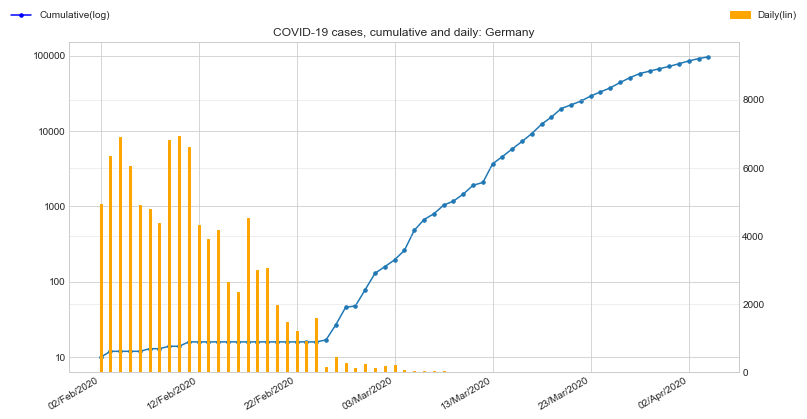

In [28]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
import matplotlib.lines as mlines
from scipy.interpolate import make_interp_spline, BSpline

country, series = random_country()
series = series.replace(0, np.nan).dropna()

sz = (series > 9) * 1

series = (series * sz).replace(0,np.nan).dropna()
print(country)
print(series)
mx = max(map(int,list(series)))

series2=list(series.copy(deep=True))
non_cumulative = []
series2.reverse()
for idx,num in enumerate(series2):
    try:
        non_cumulative.append(int(num-series2[idx+1]))
    except IndexError:
        break

non_cumulative.reverse



fig = plt.figure(figsize=(12, 6.75))
ax = series.plot(marker="o", markersize=3.5)
blue_line = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="o",
    markersize=3.5,
    label="Cumulative(log)",
)
ax2 = ax.twinx()
ax2.yaxis.set_tick_params(grid_alpha=0.4)
bars = ax2.bar(
    x=range(len(non_cumulative)),
    height=non_cumulative,
    width=0.2,
    color="orange",
    edgecolor="orange",
    label="Daily(lin)",
)
ax.set_yscale("log")  # Use logarithmic scale for clarity
fig.autofmt_xdate()
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
plt.style.use("seaborn-whitegrid")  # This is a nice theme to use.
plt.title(f"COVID-19 cases, cumulative and daily: {country.replace('*', '')}")

first_leg = plt.legend(bbox_to_anchor=(-0.1, 1.02, 1., .100), loc="upper left", handles=[blue_line])
ax = plt.gca().add_artist(first_leg)

plt.legend(bbox_to_anchor=(0.1, 1.02, 1., .100), loc="upper right", handles=[bars])
plt.margins(0.4)
plt.savefig("/tmp/plot.png", bbox_inches="tight")

print(mx)


In [1]:
# 